## Phase 1: Clean up of CRDC data files. This notebook contains code that cleans and merges the 8 individual crdc files for school characteristics, school support, school expenditures, AP, IB, SAT_ACT, Algebra 1 and enrollment into a two files: one for reading and the other for math.

### Loading necessary libraries

In [298]:
import pandas
pandas.__version__
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [299]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/CRDC

C:\Users\dansa\Documents\GitHub\Phase1\Data\CRDC


### 1. Cleaning school characteristics file

In [300]:
Sch_char = pandas.read_csv("School Characteristics.csv",encoding='cp1252')
Sch_char.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_GRADE_PS,SCH_GRADE_KG,...,SCH_GRADE_UG,SCH_UGDETAIL_ES,SCH_UGDETAIL_MS,SCH_UGDETAIL_HS,SCH_STATUS_SPED,SCH_STATUS_MAGNET,SCH_STATUS_CHARTER,SCH_STATUS_ALT,SCH_MAGNETDETAIL,SCH_ALTFOCUS
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,No,No,...,Yes,-9,-9,-9,No,No,No,No,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,No,No,...,No,-9,-9,-9,No,No,No,No,-9,-9


In [301]:
Sch_char['SCHID'] = Sch_char['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [302]:
Sch_char['LEAID'] = Sch_char['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [303]:
Sch_char.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_GRADE_PS', 'SCH_GRADE_KG', 'SCH_GRADE_G01',
       'SCH_GRADE_G02', 'SCH_GRADE_G03', 'SCH_GRADE_G04', 'SCH_GRADE_G05',
       'SCH_GRADE_G06', 'SCH_GRADE_G07', 'SCH_GRADE_G08', 'SCH_GRADE_G09',
       'SCH_GRADE_G10', 'SCH_GRADE_G11', 'SCH_GRADE_G12', 'SCH_GRADE_UG',
       'SCH_UGDETAIL_ES', 'SCH_UGDETAIL_MS', 'SCH_UGDETAIL_HS',
       'SCH_STATUS_SPED', 'SCH_STATUS_MAGNET', 'SCH_STATUS_CHARTER',
       'SCH_STATUS_ALT', 'SCH_MAGNETDETAIL', 'SCH_ALTFOCUS'],
      dtype='object')

#### Dropping unnecessary columns

In [304]:
Sch_char.drop(Sch_char.columns[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,30,31]], axis=1, inplace=True)

In [305]:
Sch_char.shape

(97632, 11)

In [306]:
#Sch_char.head()

##### Since we do not have NCESSCH ID we can impute it using the LEAID and SCHID. 
##### Note: Unique NCES public school ID is generated based on the (7-digit NCES agency ID (LEAID) + 5-digit NCES school ID (SCHID). See https://nces.ed.gov/ccd/data/txt/psu10play.txt for more info

In [307]:
cols = ['LEAID', 'SCHID']
Sch_char['NCESSCH'] = Sch_char[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [308]:
Sch_char['NCESSCH'].is_unique

True

#### Renaming columns

In [309]:
Sch_char.rename(columns={'SCH_STATUS_SPED':'Special_ed_schl','SCH_STATUS_MAGNET':'Magnet_schl','SCH_STATUS_CHARTER':'Charter_Schl','SCH_STATUS_ALT':'Alternate_schl'}, inplace=True)

In [310]:
Sch_char.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Special_ed_schl,Magnet_schl,Charter_Schl,Alternate_schl,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,No,No,No,No,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,No,No,No,No,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,No,No,No,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,No,No,No,No,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,No,No,No,No,010000500870


In [311]:
count = Sch_char['Charter_Schl'].value_counts() 
print(count) 

No     90583
Yes     7049
Name: Charter_Schl, dtype: int64


##### Recoding string Y/N values to integers 1/0

In [312]:
Sch_char['Special_ed_schl_new'] = Sch_char['Special_ed_schl'].replace(['Yes','No'],['1','0'])

In [313]:
Sch_char['Magnet_schl_new'] = Sch_char['Magnet_schl'].replace(['Yes','No'],['1','0'])

In [314]:
Sch_char['Charter_Schl_new'] = Sch_char['Charter_Schl'].replace(['Yes','No'],['1','0'])

In [315]:
Sch_char['Alternate_schl_new'] = Sch_char['Alternate_schl'].replace(['Yes','No'],['1','0'])

In [316]:
Sch_char[['Special_ed_schl_new', 'Magnet_schl_new','Charter_Schl_new','Alternate_schl_new']] = Sch_char[['Special_ed_schl_new', 'Magnet_schl_new','Charter_Schl_new','Alternate_schl_new']].astype(int)

#### Checking for missing or null values

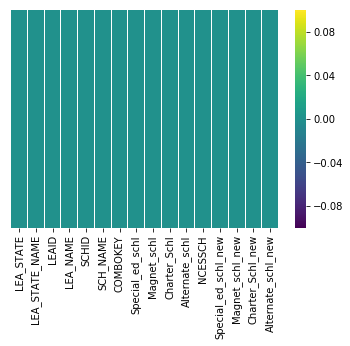

In [317]:
sns.heatmap(Sch_char.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [318]:
Sch_char.describe()

,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,Alternate_schl_new
count,97632.000000,97632.000000,97632.00000,97632.000000
mean,0.022646,0.042230,0.07220,0.034241
std,0.148774,0.201115,0.25882,0.181848
min,0.000000,0.000000,0.00000,0.000000
25%,0.000000,0.000000,0.00000,0.000000
50%,0.000000,0.000000,0.00000,0.000000
75%,0.000000,0.000000,0.00000,0.000000
max,1.000000,1.000000,1.00000,1.000000


In [319]:
Sch_char.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_schlcharacteristics.csv', index = False, header=True)

### 2. Cleaning school expenditure file

In [320]:
Sch_exp = pandas.read_csv("School Expenditures.csv", encoding='cp1252')
Sch_exp.tail()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_SAL_TOTPERS_WOFED,SCH_FTE_TEACH_WOFED,...,SCH_SAL_ADM_WOFED,SCH_SAL_TEACH_WFED,SCH_FTE_AID_WFED,SCH_SAL_AID_WFED,SCH_FTE_SUP_WFED,SCH_SAL_SUP_WFED,SCH_FTE_ADM_WFED,SCH_SAL_ADM_WFED,SCH_SAL_TOTPERS_WFED,SCH_NPE_WFED
97627,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2079,SEVERO E. COLBERG RAMIREZ,720003002079,No,0.0,0.0,...,-9.0,1373160.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97628,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2082,INTERMEDIA JUAN SERRALLES,720003002082,No,0.0,0.0,...,-9.0,676944.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97629,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2083,MARTIN GONZALEZ,720003002083,No,0.0,0.0,...,-9.0,393570.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97630,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2084,NEMESIO R. CANALES I,720003002084,No,0.0,0.0,...,-9.0,638940.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
97631,PR,PUERTO RICO,7200030,PUERTO RICO DEPARTMENT OF EDUCATION,2085,JUAN QUIRINDONGO MORELL (SUPERIOR),720003002085,No,0.0,0.0,...,-9.0,941550.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [321]:
Sch_exp['SCHID'] = Sch_exp['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [322]:
Sch_exp['LEAID'] = Sch_exp['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [323]:
Sch_exp.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_SAL_TOTPERS_WOFED', 'SCH_FTE_TEACH_WOFED',
       'SCH_SAL_TEACH_WOFED', 'SCH_NPE_WOFED', 'SCH_FTE_AID_WOFED',
       'SCH_SAL_AID_WOFED', 'SCH_FTE_SUP_WOFED', 'SCH_SAL_SUP_WOFED',
       'SCH_FTE_ADM_WOFED', 'SCH_SAL_ADM_WOFED', 'SCH_SAL_TEACH_WFED',
       'SCH_FTE_AID_WFED', 'SCH_SAL_AID_WFED', 'SCH_FTE_SUP_WFED',
       'SCH_SAL_SUP_WFED', 'SCH_FTE_ADM_WFED', 'SCH_SAL_ADM_WFED',
       'SCH_SAL_TOTPERS_WFED', 'SCH_NPE_WFED'],
      dtype='object')

In [324]:
Sch_exp.drop(Sch_exp.columns[[7,8,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26]], axis=1, inplace=True)

In [325]:
Sch_exp.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTE_TEACH_WOFED,SCH_SAL_TEACH_WOFED
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,1827143.00
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,1305463.00
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,60.00,3400850.00
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,305220.00
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,38.29,1782926.22


##### Since we do not have NCESSCH ID we can impute it using the LEAID and SCHID. 

In [326]:
cols = ['LEAID', 'SCHID']
Sch_exp['NCESSCH'] = Sch_exp[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [327]:
Sch_exp.shape

(97632, 10)

In [328]:
Sch_exp['NCESSCH'].is_unique

True

##### Renaming columns

In [329]:
Sch_exp.rename(columns={'SCH_FTE_TEACH_WOFED':'FTE_teachers_count','SCH_SAL_TEACH_WOFED':'SalaryforTeachers'}, inplace=True)

In [330]:
Sch_exp.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,FTE_teachers_count,SalaryforTeachers,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,1827143.00,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,1305463.00,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,60.00,3400850.00,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,305220.00,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,38.29,1782926.22,010000500870


In [331]:
#Sch_exp['Teacher_salary_ratio'] = (Sch_exp['SalaryforTeachers'] / Sch_exp['FTE_teachers_count'])

#### Checking for missing or null values

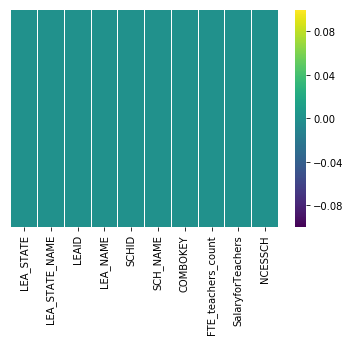

In [332]:
sns.heatmap(Sch_exp.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [333]:
Sch_exp.describe()

,FTE_teachers_count,SalaryforTeachers
count,9.763200e+04,9.763200e+04
mean,6.873048e+01,1.816205e+06
std,9.405691e+03,1.713907e+06
min,-9.000000e+00,-9.000000e+00
25%,1.500000e+01,7.903983e+05
50%,2.560000e+01,1.469219e+06
75%,3.810000e+01,2.307242e+06
max,2.840644e+06,3.126824e+07


#### Dropping columns with less than zero FTE Teacher counts and Salary expenditures

In [334]:
Sch_expTC= Sch_exp[Sch_exp.FTE_teachers_count > 0]

In [335]:
Sch_exp_clean= Sch_expTC[Sch_expTC.SalaryforTeachers > 0]

In [336]:
Sch_exp_clean.shape

(92988, 10)

In [337]:
Sch_exp_clean.describe()

,FTE_teachers_count,SalaryforTeachers
count,9.298800e+04,9.298800e+04
mean,7.234695e+01,1.906899e+06
std,9.637687e+03,1.706239e+06
min,1.000000e-02,1.000000e-02
25%,1.687000e+01,8.983161e+05
50%,2.650000e+01,1.532998e+06
75%,3.900000e+01,2.364458e+06
max,2.840644e+06,3.126824e+07


In [338]:
Sch_exp_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,FTE_teachers_count,SalaryforTeachers,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,1827143.00,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,1305463.00,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,60.00,3400850.00,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,305220.00,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,38.29,1782926.22,010000500870


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018534545898>,
      dtype=object)

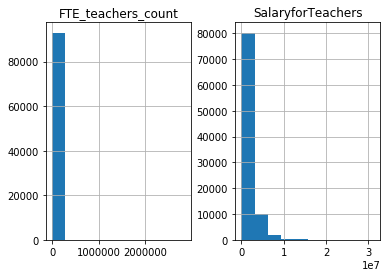

In [339]:
Sch_exp_clean.hist()

In [340]:
Sch_exp_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_schlexpenses.csv', index = False, header=True)

### 3. Cleaning school support file

In [341]:
Sch_sup= pandas.read_csv("School Support.csv",encoding='cp1252')
Sch_sup.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,...,SCH_FTETEACH_SY,SCH_TEACHERS_CURR_TOT,SCH_TEACHERS_PREV_TOT,SCH_FTETEACH_ABSENT,SCH_FTECOUNSELORS,SCH_FTESECURITY_LEO,SCH_FTESECURITY_GUA,SCH_FTESERVICES_NUR,SCH_FTESERVICES_PSY,SCH_FTESERVICES_SOC
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,25.00,25.00,...,1.0,25.0,25.0,2.0,1.0,0.0,-9.0,0.0,0.0,0.0
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,16.00,16.00,...,0.0,0.0,0.0,3.0,1.0,0.0,-9.0,0.0,0.0,0.0
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,11.00,11.00,...,0.0,11.0,11.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,3.00,3.00,...,0.0,3.0,3.0,2.0,0.0,0.0,-9.0,0.0,0.0,0.0
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,39.29,39.29,...,3.0,39.0,39.0,8.0,2.0,1.0,0.0,1.0,0.0,0.0


In [342]:
Sch_sup['SCHID'] = Sch_sup['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [343]:
Sch_sup['LEAID'] = Sch_sup['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [344]:
Sch_sup.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'SCH_FTETEACH_FY', 'SCH_FTETEACH_SY',
       'SCH_TEACHERS_CURR_TOT', 'SCH_TEACHERS_PREV_TOT', 'SCH_FTETEACH_ABSENT',
       'SCH_FTECOUNSELORS', 'SCH_FTESECURITY_LEO', 'SCH_FTESECURITY_GUA',
       'SCH_FTESERVICES_NUR', 'SCH_FTESERVICES_PSY', 'SCH_FTESERVICES_SOC'],
      dtype='object')

In [345]:
Sch_sup.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,...,SCH_FTETEACH_SY,SCH_TEACHERS_CURR_TOT,SCH_TEACHERS_PREV_TOT,SCH_FTETEACH_ABSENT,SCH_FTECOUNSELORS,SCH_FTESECURITY_LEO,SCH_FTESECURITY_GUA,SCH_FTESERVICES_NUR,SCH_FTESERVICES_PSY,SCH_FTESERVICES_SOC
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,25.00,25.00,...,1.0,25.0,25.0,2.0,1.0,0.0,-9.0,0.0,0.0,0.0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,Yes,16.00,16.00,...,0.0,0.0,0.0,3.0,1.0,0.0,-9.0,0.0,0.0,0.0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,11.00,11.00,...,0.0,11.0,11.0,2.0,1.0,0.0,3.0,0.0,0.0,0.0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,3.00,3.00,...,0.0,3.0,3.0,2.0,0.0,0.0,-9.0,0.0,0.0,0.0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,No,39.29,39.29,...,3.0,39.0,39.0,8.0,2.0,1.0,0.0,1.0,0.0,0.0


##### Dropping irrelevant columns

In [346]:
Sch_sup.drop(Sch_sup.columns[[7,11,12,13,14,15,16,17,18,19,20,21]], axis=1, inplace=True)

In [347]:
Sch_sup.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,25.00,0.0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,16.00,0.0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,11.00,11.00,0.0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,3.00,0.0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,39.29,39.29,0.0


##### Since we do not have NCESSCH ID we can impute it using the LEAID and SCHID. 

In [348]:
cols = ['LEAID', 'SCHID']
Sch_sup['NCESSCH'] = Sch_sup[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [349]:
Sch_sup.shape

(97632, 11)

In [350]:
Sch_sup['NCESSCH'].is_unique

True

#### Checking for missing or null values

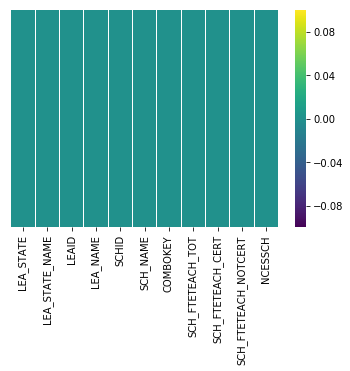

In [351]:
sns.heatmap(Sch_sup.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [352]:
Sch_sup.describe()

,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
count,97632.000000,97632.000000,97632.000000
mean,34.045934,32.962739,1.070287
std,26.406140,25.889269,3.814373
min,-6.000000,-6.000000,-6.000000
25%,18.000000,17.000000,0.000000
50%,29.000000,28.000000,0.000000
75%,43.000000,42.000000,0.180000
max,607.000000,499.000000,157.000000


#### Filtering FTE count greater than 1 and Cert count greater than -5

In [353]:
Sch_sup_FTEGT1= Sch_sup[Sch_sup.SCH_FTETEACH_TOT > 1]

In [354]:
Sch_sup_clean= Sch_sup_FTEGT1[Sch_sup_FTEGT1.SCH_FTETEACH_CERT > -5]

In [355]:
Sch_sup_clean.describe()

,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
count,95330.000000,95330.000000,95330.000000
mean,34.854793,33.744798,1.096928
std,26.198384,25.696119,3.855301
min,1.010000,0.000000,0.000000
25%,18.900000,18.000000,0.000000
50%,29.645000,28.945000,0.000000
75%,43.500000,42.120000,0.500000
max,607.000000,499.000000,157.000000


In [356]:
Sch_sup_clean.shape

(95330, 11)

In [357]:
Sch_sup_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT,NCESSCH
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,25.00,25.00,0.0,010000201705
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,16.00,16.00,0.0,010000201706
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,11.00,11.00,0.0,010000201876
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3.00,3.00,0.0,010000299995
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,39.29,39.29,0.0,010000500870


In [358]:
Sch_sup_clean.describe()

,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
count,95330.000000,95330.000000,95330.000000
mean,34.854793,33.744798,1.096928
std,26.198384,25.696119,3.855301
min,1.010000,0.000000,0.000000
25%,18.900000,18.000000,0.000000
50%,29.645000,28.945000,0.000000
75%,43.500000,42.120000,0.500000
max,607.000000,499.000000,157.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018586E85470>,
      dtype=object)

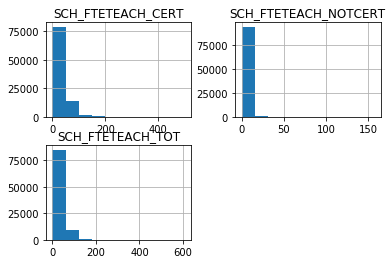

In [359]:
Sch_sup_clean.hist()

In [360]:
Sch_sup_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_schlsupport.csv', index = False, header=True)

### 4. Cleaning SAT and ACT file

In [361]:
SAT_ACT = pandas.read_csv("SAT and ACT.csv", encoding='cp1252')
SAT_ACT.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_SATACT_HI_M,SCH_SATACT_HI_F,...,SCH_SATACT_WH_M,SCH_SATACT_WH_F,SCH_SATACT_TR_M,SCH_SATACT_TR_F,TOT_SATACT_M,TOT_SATACT_F,SCH_SATACT_LEP_M,SCH_SATACT_LEP_F,SCH_SATACT_IDEA_M,SCH_SATACT_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,0,0,...,7,0,0,0,18,0,0,0,0,0
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,0,0,...,6,0,0,0,10,0,0,0,0,0
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,0,0,...,1,0,0,0,2,0,0,0,0,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,0,0,...,1,0,0,0,3,0,0,0,0,0
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [362]:
SAT_ACT['LEAID'] = SAT_ACT['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [363]:
SAT_ACT['SCHID'] = SAT_ACT['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [364]:
SAT_ACT.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_SATACT_HI_M', 'SCH_SATACT_HI_F',
       'SCH_SATACT_AM_M', 'SCH_SATACT_AM_F', 'SCH_SATACT_AS_M',
       'SCH_SATACT_AS_F', 'SCH_SATACT_HP_M', 'SCH_SATACT_HP_F',
       'SCH_SATACT_BL_M', 'SCH_SATACT_BL_F', 'SCH_SATACT_WH_M',
       'SCH_SATACT_WH_F', 'SCH_SATACT_TR_M', 'SCH_SATACT_TR_F', 'TOT_SATACT_M',
       'TOT_SATACT_F', 'SCH_SATACT_LEP_M', 'SCH_SATACT_LEP_F',
       'SCH_SATACT_IDEA_M', 'SCH_SATACT_IDEA_F'],
      dtype='object')

In [365]:
SAT_ACT.shape

(97632, 28)

In [366]:
SAT_ACT.drop(SAT_ACT.columns[[7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,24,25,26,27]], axis=1, inplace=True)

In [367]:
SAT_ACT.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,TOT_SATACT_M,TOT_SATACT_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,18,0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,10,0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,2,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3,0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,-9,-9


In [368]:
cols = ['LEAID', 'SCHID']
SAT_ACT['NCESSCH'] = SAT_ACT[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

#### Adding total count of male and female participation on ACT and SAT

In [369]:
SAT_ACT.rename(columns={'TOT_SATACT_M':'Male_part_count','TOT_SATACT_F':'Female_part_count'}, inplace=True)

In [370]:
SAT_ACT.describe()

,Male_part_count,Female_part_count
count,97632.000000,97632.000000
mean,11.282950,13.440306
std,62.969086,68.903726
min,-9.000000,-9.000000
25%,-9.000000,-9.000000
50%,-9.000000,-9.000000
75%,0.000000,0.000000
max,1454.000000,1334.000000


In [371]:
SAT_ACTGT0= SAT_ACT.loc[SAT_ACT['Male_part_count'] > 0]

In [372]:
SAT_ACTGT0.describe()

,Male_part_count,Female_part_count
count,20036.000000,20036.000000
mean,85.926183,96.224097
std,110.816134,120.207337
min,1.000000,0.000000
25%,13.000000,15.000000
50%,43.000000,49.000000
75%,116.000000,134.000000
max,1454.000000,1334.000000


In [373]:
SAT_ACTGT0['Total_SAT_ACT_students'] = (SAT_ACTGT0['Male_part_count'] + SAT_ACTGT0['Female_part_count'])

C:\Users\dansa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [374]:
SAT_ACTGT0.describe()

,Male_part_count,Female_part_count,Total_SAT_ACT_students
count,20036.000000,20036.000000,20036.000000
mean,85.926183,96.224097,182.150279
std,110.816134,120.207337,229.439796
min,1.000000,0.000000,1.000000
25%,13.000000,15.000000,29.000000
50%,43.000000,49.000000,94.000000
75%,116.000000,134.000000,249.000000
max,1454.000000,1334.000000,2788.000000


In [375]:
SAT_ACTGT0.shape

(20036, 11)

#### Keeping total counts greater than 0

In [376]:
SAT_ACT_clean= SAT_ACTGT0[SAT_ACTGT0.Total_SAT_ACT_students > 0]

In [377]:
SAT_ACT_clean.shape

(20036, 11)

In [378]:
SAT_ACT_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Male_part_count,Female_part_count,NCESSCH,Total_SAT_ACT_students
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,18,0,010000201705,18
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,10,0,010000201706,10
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,2,0,010000201876,2
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,3,0,010000299995,3
5,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,177,186,010000500871,363


#### Checking for missing or null values

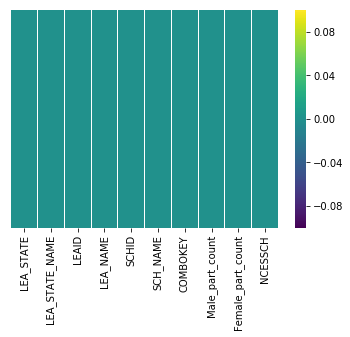

In [379]:
sns.heatmap(SAT_ACT.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [380]:
SAT_ACT_clean.describe()

,Male_part_count,Female_part_count,Total_SAT_ACT_students
count,20036.000000,20036.000000,20036.000000
mean,85.926183,96.224097,182.150279
std,110.816134,120.207337,229.439796
min,1.000000,0.000000,1.000000
25%,13.000000,15.000000,29.000000
50%,43.000000,49.000000,94.000000
75%,116.000000,134.000000,249.000000
max,1454.000000,1334.000000,2788.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018590EA0D68>,
      dtype=object)

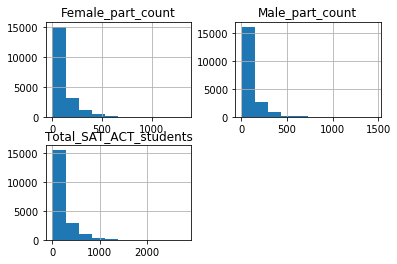

In [381]:
SAT_ACT_clean.hist()

In [382]:
SAT_ACT_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_SAT_ACT.csv', index = False, header=True)

### 5. Cleaning IB file

In [383]:
IB= pandas.read_csv("International Baccalaureate.csv",encoding='cp1252')
IB.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_IBENR_IND,SCH_IBENR_HI_M,...,SCH_IBENR_WH_M,SCH_IBENR_WH_F,SCH_IBENR_TR_M,SCH_IBENR_TR_F,TOT_IBENR_M,TOT_IBENR_F,SCH_IBENR_LEP_M,SCH_IBENR_LEP_F,SCH_IBENR_IDEA_M,SCH_IBENR_IDEA_F
0,AL,ALABAMA,0100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,010000201705,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,010000201706,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,1876,Alabama Youth Services,010000201876,No,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,870,Albertville Middle School,010000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [384]:
IB['SCHID'] = IB['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [385]:
IB['LEAID'] = IB['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [386]:
IB.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_IBENR_IND', 'SCH_IBENR_HI_M', 'SCH_IBENR_HI_F',
       'SCH_IBENR_AM_M', 'SCH_IBENR_AM_F', 'SCH_IBENR_AS_M', 'SCH_IBENR_AS_F',
       'SCH_IBENR_HP_M', 'SCH_IBENR_HP_F', 'SCH_IBENR_BL_M', 'SCH_IBENR_BL_F',
       'SCH_IBENR_WH_M', 'SCH_IBENR_WH_F', 'SCH_IBENR_TR_M', 'SCH_IBENR_TR_F',
       'TOT_IBENR_M', 'TOT_IBENR_F', 'SCH_IBENR_LEP_M', 'SCH_IBENR_LEP_F',
       'SCH_IBENR_IDEA_M', 'SCH_IBENR_IDEA_F'],
      dtype='object')

In [387]:
IB.shape

(97632, 29)

In [388]:
IB.drop(IB.columns[[7,9,10,11,12,13,14,15,16,17,18,19,20,21,22,25,26,27,28]], axis=1, inplace=True)

In [389]:
IB.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_IBENR_IND,TOT_IBENR_M,TOT_IBENR_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,-9,-9,-9


In [390]:
cols = ['LEAID', 'SCHID']
IB['NCESSCH'] = IB[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [391]:
IB.rename(columns={'TOT_IBENR_M':'Male_enroll_count','TOT_IBENR_F':'Female_enroll_count'}, inplace=True)

In [392]:
IB.describe()

,Male_enroll_count,Female_enroll_count
count,97632.000000,97632.000000
mean,-8.142740,-7.885181
std,12.784511,15.816513
min,-9.000000,-9.000000
25%,-9.000000,-9.000000
50%,-9.000000,-9.000000
75%,-9.000000,-9.000000
max,688.000000,783.000000


#### Recoding missing values as zero so that total counts can be calculated later

In [393]:
IB['Male_enroll_count'] = IB['Male_enroll_count'].replace(-9,0)

In [394]:
IB['Female_enroll_count'] = IB['Female_enroll_count'].replace(-9,0)

In [395]:
IB.describe()

,Male_enroll_count,Female_enroll_count
count,97632.00000,97632.000000
mean,0.76858,1.026139
std,12.20472,15.201418
min,-6.00000,-6.000000
25%,0.00000,0.000000
50%,0.00000,0.000000
75%,0.00000,0.000000
max,688.00000,783.000000


In [396]:
IB['Total_IB_students'] = (IB['Male_enroll_count'] + IB['Female_enroll_count'])

In [397]:
IB.describe()

,Male_enroll_count,Female_enroll_count,Total_IB_students
count,97632.00000,97632.000000,97632.000000
mean,0.76858,1.026139,1.794719
std,12.20472,15.201418,27.229275
min,-6.00000,-6.000000,-12.000000
25%,0.00000,0.000000,0.000000
50%,0.00000,0.000000,0.000000
75%,0.00000,0.000000,0.000000
max,688.00000,783.000000,1335.000000


In [398]:
IB.shape

(97632, 12)

#### Keeping IB program indicator with Y/N

In [399]:
IB_clean= IB[IB.SCH_IBENR_IND != '-9']

In [400]:
IB_clean.shape

(28152, 12)

In [401]:
IB_clean.dtypes

LEA_STATE              object
LEA_STATE_NAME         object
LEAID                  object
LEA_NAME               object
SCHID                  object
SCH_NAME               object
COMBOKEY               object
SCH_IBENR_IND          object
Male_enroll_count       int64
Female_enroll_count     int64
NCESSCH                object
Total_IB_students       int64
dtype: object

##### Recoding string Y/N values to integers 1/0

In [402]:
IB_clean['SCH_IBENR_IND_new'] = IB_clean['SCH_IBENR_IND'].replace(['Yes','No'],['1','0'])

C:\Users\dansa\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [403]:
IB_clean[['SCH_IBENR_IND_new']]=IB_clean[['SCH_IBENR_IND_new']].astype(int)

In [404]:
IB_clean.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_IBENR_IND,Male_enroll_count,Female_enroll_count,NCESSCH,Total_IB_students,SCH_IBENR_IND_new
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,0,0,010000201876,0,0
5,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,No,0,0,010000500871,0,0
11,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,No,0,0,010000600872,0,0
14,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,No,0,0,010000600878,0,0
16,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,No,0,0,010000600883,0,0


#### Checking for missing or null values

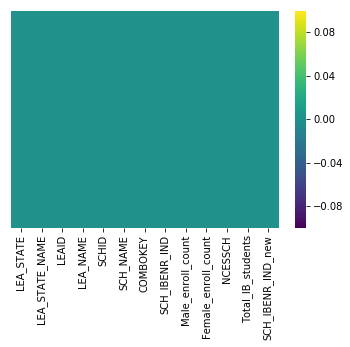

In [405]:
sns.heatmap(IB_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [406]:
IB_clean.describe()

,Male_enroll_count,Female_enroll_count,Total_IB_students,SCH_IBENR_IND_new
count,28152.000000,28152.000000,28152.000000,28152.000000
mean,2.665459,3.558681,6.224140,0.032538
std,22.617205,28.149791,50.436182,0.201606
min,-6.000000,-6.000000,-12.000000,-6.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,688.000000,783.000000,1335.000000,1.000000


##### Filtering out negative values

In [407]:
IB_clean1= IB_clean[IB_clean.SCH_IBENR_IND != '-6']

In [408]:
IB_clean2= IB_clean1[IB_clean1.SCH_IBENR_IND != '-5']

In [409]:
IB_clean2.describe()

,Male_enroll_count,Female_enroll_count,Total_IB_students,SCH_IBENR_IND_new
count,28145.000000,28145.000000,28145.000000,28145.000000
mean,2.667508,3.560952,6.228460,0.033931
std,22.619643,28.152922,50.441708,0.181056
min,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000
max,688.000000,783.000000,1335.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018592E65F28>,
      dtype=object)

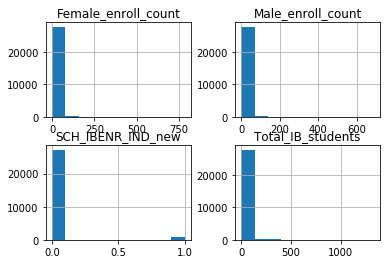

In [410]:
IB_clean2.hist()

In [411]:
IB_clean2.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_IB.csv', index = False, header=True)

### 6. Cleaning AP file

In [412]:
AP = pandas.read_csv("Advanced Placement.csv",encoding='cp1252')
AP.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_APENR_IND,SCH_APCOURSES,...,SCH_APEXAM_NONE_WH_M,SCH_APEXAM_NONE_WH_F,SCH_APEXAM_NONE_TR_M,SCH_APEXAM_NONE_TR_F,TOT_APEXAM_NONE_M,TOT_APEXAM_NONE_F,SCH_APEXAM_NONE_LEP_M,SCH_APEXAM_NONE_LEP_F,SCH_APEXAM_NONE_IDEA_M,SCH_APEXAM_NONE_IDEA_F
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,No,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,-9,-9,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [413]:
AP['SCHID'] = AP['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [414]:
AP['LEAID'] = AP['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [415]:
AP.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_APENR_IND', 'SCH_APCOURSES',
       ...
       'SCH_APEXAM_NONE_WH_M', 'SCH_APEXAM_NONE_WH_F', 'SCH_APEXAM_NONE_TR_M',
       'SCH_APEXAM_NONE_TR_F', 'TOT_APEXAM_NONE_M', 'TOT_APEXAM_NONE_F',
       'SCH_APEXAM_NONE_LEP_M', 'SCH_APEXAM_NONE_LEP_F',
       'SCH_APEXAM_NONE_IDEA_M', 'SCH_APEXAM_NONE_IDEA_F'],
      dtype='object', length=134)

In [416]:
AP.shape

(97632, 134)

In [417]:
AP=AP[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_APENR_IND','SCH_APCOURSES','SCH_APMATHENR_IND','TOT_APMATHENR_M','TOT_APMATHENR_F','SCH_APOTHENR_IND','TOT_APOTHENR_M','TOT_APOTHENR_F','TOT_APEXAM_ONEORMORE_M','TOT_APEXAM_ONEORMORE_F']]

In [418]:
AP.shape

(97632, 17)

In [419]:
AP.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_APENR_IND,SCH_APCOURSES,SCH_APMATHENR_IND,TOT_APMATHENR_M,TOT_APMATHENR_F,SCH_APOTHENR_IND,TOT_APOTHENR_M,TOT_APOTHENR_F,TOT_APEXAM_ONEORMORE_M,TOT_APEXAM_ONEORMORE_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,No,-9,-9,-9,-9,-9,-9,-9,-9,-9
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,10000500870,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [420]:
cols = ['LEAID', 'SCHID']
AP['NCESSCH'] = AP[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [421]:
AP.rename(columns={'TOT_APMATHENR_M':'Male_enroll_math_count','TOT_APMATHENR_F':'Female_enroll_math_count','TOT_APOTHENR_M':'Male_enroll_other_count','TOT_APOTHENR_F':'Female_enroll_other_count'}, inplace=True)

In [422]:
AP.describe()

,SCH_APCOURSES,Male_enroll_math_count,Female_enroll_math_count,Male_enroll_other_count,Female_enroll_other_count,TOT_APEXAM_ONEORMORE_M,TOT_APEXAM_ONEORMORE_F
count,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000
mean,-6.262629,-4.615833,-4.569199,3.272175,7.327505,2.234493,5.464520
std,7.395256,18.783257,18.562187,50.884819,65.043545,46.923169,58.484327
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
50%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
max,82.000000,888.000000,884.000000,2106.000000,1792.000000,2135.000000,1776.000000


In [423]:
AP.shape

(97632, 18)

In [424]:
AP= AP[AP.SCH_APENR_IND.isin(['Yes','No'])]

In [425]:
AP.shape

(28147, 18)

In [426]:
AP.describe()

,SCH_APCOURSES,Male_enroll_math_count,Female_enroll_math_count,Male_enroll_other_count,Female_enroll_other_count,TOT_APEXAM_ONEORMORE_M,TOT_APEXAM_ONEORMORE_F
count,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000
mean,0.494369,6.206523,6.368281,33.567236,47.633744,29.967883,41.171706
std,11.204833,32.545830,32.047986,87.703219,111.320615,80.973195,100.364182
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
50%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,8.000000,9.000000,10.000000,34.000000,51.000000,30.000000,43.000000
max,82.000000,888.000000,884.000000,2106.000000,1792.000000,2135.000000,1776.000000


##### If AP enrollment indicator is a No, then the corresponding columns for courses and student counts are marked a -9. So lets replace -9 with 0 counts for schools that don't have any AP enrollment indicators

In [427]:
AP['SCH_APCOURSES'] = AP['SCH_APCOURSES'].replace(-9,0)

In [428]:
AP['Male_enroll_math_count'] = AP['Male_enroll_math_count'].replace(-9,0)

In [429]:
AP['Female_enroll_math_count'] = AP['Female_enroll_math_count'].replace(-9,0)

In [430]:
AP['Male_enroll_other_count'] = AP['Male_enroll_other_count'].replace(-9,0)

In [431]:
AP['Female_enroll_other_count'] = AP['Female_enroll_other_count'].replace(-9,0)

In [432]:
AP['TOT_APEXAM_ONEORMORE_M'] = AP['TOT_APEXAM_ONEORMORE_M'].replace(-9,0)

In [433]:
AP['TOT_APEXAM_ONEORMORE_F'] = AP['TOT_APEXAM_ONEORMORE_F'].replace(-9,0)

Total counts of M and F

In [434]:
AP['Total_AP_math_students'] = (AP['Male_enroll_math_count'] + AP['Female_enroll_math_count'])

In [435]:
AP['Total_AP_other_students'] = (AP['Male_enroll_other_count'] + AP['Female_enroll_other_count'])

In [436]:
AP['Total_students_tookAP'] = (AP['TOT_APEXAM_ONEORMORE_M'] + AP['TOT_APEXAM_ONEORMORE_F'])

In [437]:
AP.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APMATHENR_IND',
       'Male_enroll_math_count', 'Female_enroll_math_count',
       'SCH_APOTHENR_IND', 'Male_enroll_other_count',
       'Female_enroll_other_count', 'TOT_APEXAM_ONEORMORE_M',
       'TOT_APEXAM_ONEORMORE_F', 'NCESSCH', 'Total_AP_math_students',
       'Total_AP_other_students', 'Total_students_tookAP'],
      dtype='object')

In [438]:
AP_math=AP[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APMATHENR_IND',
       'Total_AP_math_students','Total_students_tookAP']]

In [439]:
AP_math.describe()

,SCH_APCOURSES,Total_AP_math_students,Total_students_tookAP
count,28147.000000,28147.000000,28147.000000
mean,5.078943,23.701460,80.308736
std,7.663777,59.223961,175.787480
min,-5.000000,-10.000000,-10.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,8.000000,20.000000,73.000000
max,82.000000,1650.000000,3737.000000


#### Filtering out any ligering negative values that indicate missing not N/As

In [440]:
AP_math_clean= AP_math.loc[AP_math['SCH_APCOURSES'] > -1]

In [441]:
AP_math_clean= AP_math_clean.loc[AP_math_clean['Total_AP_math_students'] > -1]

In [442]:
AP_math_clean= AP_math_clean.loc[AP_math_clean['Total_students_tookAP'] > -1]

In [443]:
AP_math_clean.describe()

,SCH_APCOURSES,Total_AP_math_students,Total_students_tookAP
count,28142.000000,28142.000000,28142.000000
mean,5.078211,23.698458,80.324071
std,7.663439,59.221949,175.799319
min,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000
75%,8.000000,20.000000,73.750000
max,82.000000,1650.000000,3737.000000


In [444]:
AP_math_clean.shape

(28142, 13)

In [445]:
AP_math_clean.dtypes

LEA_STATE                 object
LEA_STATE_NAME            object
LEAID                     object
LEA_NAME                  object
SCHID                     object
SCH_NAME                  object
COMBOKEY                  object
NCESSCH                   object
SCH_APENR_IND             object
SCH_APCOURSES              int64
SCH_APMATHENR_IND         object
Total_AP_math_students     int64
Total_students_tookAP      int64
dtype: object

##### Recoding string Y/N values to integers 1/0

In [446]:
AP_math_clean['SCH_APENR_IND_new'] = AP_math_clean['SCH_APENR_IND'].replace(['Yes','No'],['1','0'])

In [447]:
AP_math_clean[['SCH_APENR_IND_new']] = AP_math_clean[['SCH_APENR_IND_new']].astype(int)

In [448]:
AP_math_clean['SCH_APMATHENR_IND_new'] = AP_math_clean['SCH_APMATHENR_IND'].replace(['Yes','No','-9'],['1','0','0'])

In [449]:
AP_math_clean[['SCH_APMATHENR_IND_new']] = AP_math_clean[['SCH_APMATHENR_IND_new']].astype(int)

In [450]:
AP_math_clean.dtypes

LEA_STATE                 object
LEA_STATE_NAME            object
LEAID                     object
LEA_NAME                  object
SCHID                     object
SCH_NAME                  object
COMBOKEY                  object
NCESSCH                   object
SCH_APENR_IND             object
SCH_APCOURSES              int64
SCH_APMATHENR_IND         object
Total_AP_math_students     int64
Total_students_tookAP      int64
SCH_APENR_IND_new          int32
SCH_APMATHENR_IND_new      int32
dtype: object

#### Checking for missing or null values

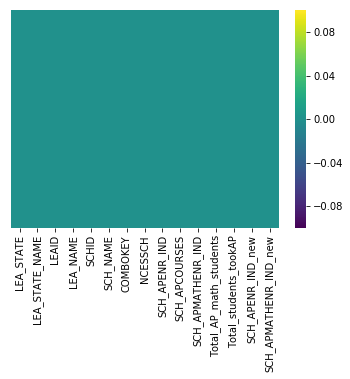

In [451]:
sns.heatmap(AP_math_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [452]:
AP_math_clean.describe()

,SCH_APCOURSES,Total_AP_math_students,Total_students_tookAP,SCH_APENR_IND_new,SCH_APMATHENR_IND_new
count,28142.000000,28142.000000,28142.000000,28142.000000,28142.000000
mean,5.078211,23.698458,80.324071,0.490512,0.381743
std,7.663439,59.221949,175.799319,0.499919,0.485823
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,20.000000,73.750000,1.000000,1.000000
max,82.000000,1650.000000,3737.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000018592E657B8>,
      dtype=object)

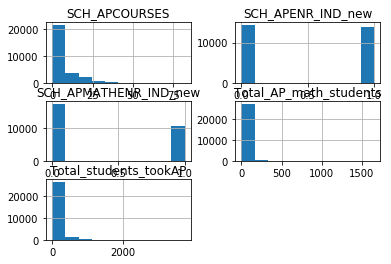

In [453]:
AP_math_clean.hist()

In [454]:
AP_math_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_AP_math.csv', index = False, header=True)

In [455]:
AP_other=AP[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APOTHENR_IND',
       'Total_AP_other_students', 'Total_students_tookAP']]

In [456]:
AP_other_clean= AP_other[AP_other.SCH_APENR_IND.isin(['Yes','No'])]

In [457]:
AP_other_clean.shape

(28147, 13)

In [458]:
AP_other_clean.dtypes

LEA_STATE                  object
LEA_STATE_NAME             object
LEAID                      object
LEA_NAME                   object
SCHID                      object
SCH_NAME                   object
COMBOKEY                   object
NCESSCH                    object
SCH_APENR_IND              object
SCH_APCOURSES               int64
SCH_APOTHENR_IND           object
Total_AP_other_students     int64
Total_students_tookAP       int64
dtype: object

In [459]:
count_other = AP_other_clean['SCH_APOTHENR_IND'].value_counts() 
print(count_other) 

-9     14338
Yes    12923
No       886
Name: SCH_APOTHENR_IND, dtype: int64


##### Recoding string Y/N values to integers 1/0

In [460]:
AP_other_clean['SCH_APENR_IND_new'] = AP_other_clean['SCH_APENR_IND'].replace(['Yes','No'],['1','0'])

In [461]:
AP_other_clean[['SCH_APENR_IND_new']] = AP_other_clean[['SCH_APENR_IND_new']].astype(int)

In [462]:
AP_other_clean['SCH_APOTHENR_IND_new'] = AP_other_clean['SCH_APOTHENR_IND'].replace(['Yes','No','-9'],['1','0','0'])

In [463]:
AP_other_clean[['SCH_APOTHENR_IND_new']] = AP_other_clean[['SCH_APOTHENR_IND_new']].astype(int)

In [464]:
AP_other_clean.dtypes

LEA_STATE                  object
LEA_STATE_NAME             object
LEAID                      object
LEA_NAME                   object
SCHID                      object
SCH_NAME                   object
COMBOKEY                   object
NCESSCH                    object
SCH_APENR_IND              object
SCH_APCOURSES               int64
SCH_APOTHENR_IND           object
Total_AP_other_students     int64
Total_students_tookAP       int64
SCH_APENR_IND_new           int32
SCH_APOTHENR_IND_new        int32
dtype: object

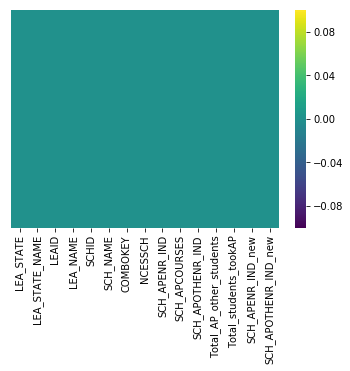

In [465]:
sns.heatmap(AP_other_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [466]:
AP_other_clean.describe()

,SCH_APCOURSES,Total_AP_other_students,Total_students_tookAP,SCH_APENR_IND_new,SCH_APOTHENR_IND_new
count,28147.000000,28147.000000,28147.000000,28147.000000,28147.000000
mean,5.078943,90.936725,80.308736,0.490603,0.459125
std,7.663777,193.015376,175.787480,0.499921,0.498335
min,-5.000000,-10.000000,-10.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,86.000000,73.000000,1.000000,1.000000
max,82.000000,3718.000000,3737.000000,1.000000,1.000000


In [467]:
AP_other_clean1= AP_other_clean.loc[AP_other_clean['SCH_APCOURSES'] > -1]

In [468]:
AP_other_clean2= AP_other_clean1.loc[AP_other_clean1['Total_students_tookAP'] > -1]

In [469]:
AP_other_clean2.describe()

,SCH_APCOURSES,Total_AP_other_students,Total_students_tookAP,SCH_APENR_IND_new,SCH_APOTHENR_IND_new
count,28144.000000,28144.000000,28144.000000,28144.000000,28144.000000
mean,5.078418,90.925135,80.318363,0.490549,0.459068
std,7.663206,193.015931,175.794376,0.499920,0.498331
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000
75%,8.000000,86.000000,73.250000,1.000000,1.000000
max,82.000000,3718.000000,3737.000000,1.000000,1.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000185693D0EF0>,
      dtype=object)

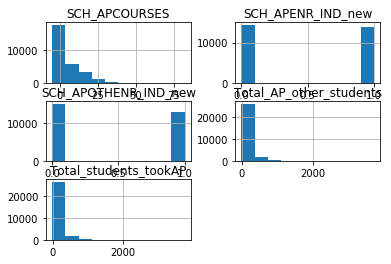

In [470]:
AP_other_clean.hist()

In [471]:
AP_other_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_AP_other.csv', index = False, header=True)

### 7. Cleaning Algebra 1 file

In [472]:
Alg1 = pandas.read_csv("Algebra I.csv",encoding='cp1252')
Alg1.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_ALGCLASSES_GS0708,SCH_ALGCERT_GS0708,...,SCH_ALGPASS_GS1112_WH_M,SCH_ALGPASS_GS1112_WH_F,SCH_ALGPASS_GS1112_TR_M,SCH_ALGPASS_GS1112_TR_F,TOT_ALGPASS_GS1112_M,TOT_ALGPASS_GS1112_F,SCH_ALGPASS_GS1112_LEP_M,SCH_ALGPASS_GS1112_LEP_F,SCH_ALGPASS_GS1112_IDEA_M,SCH_ALGPASS_GS1112_IDEA_F
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,0,-9,...,0,0,0,0,0,0,0,0,0,0
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,0,-9,...,0,0,0,0,0,0,0,0,0,0
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,0,-9,...,0,0,0,0,1,0,0,0,0,0
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,0,-9,...,0,0,0,0,0,0,0,0,0,0
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,3,3,...,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [473]:
Alg1['SCHID'] = Alg1['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [474]:
Alg1['LEAID'] = Alg1['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [475]:
Alg1.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_ALGCLASSES_GS0708', 'SCH_ALGCERT_GS0708',
       ...
       'SCH_ALGPASS_GS1112_WH_M', 'SCH_ALGPASS_GS1112_WH_F',
       'SCH_ALGPASS_GS1112_TR_M', 'SCH_ALGPASS_GS1112_TR_F',
       'TOT_ALGPASS_GS1112_M', 'TOT_ALGPASS_GS1112_F',
       'SCH_ALGPASS_GS1112_LEP_M', 'SCH_ALGPASS_GS1112_LEP_F',
       'SCH_ALGPASS_GS1112_IDEA_M', 'SCH_ALGPASS_GS1112_IDEA_F'],
      dtype='object', length=136)

In [476]:
Alg1.shape

(97632, 136)

In [477]:
Alg1=Alg1[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','SCH_MATHCLASSES_ALG','SCH_MATHCERT_ALG','TOT_ALGENR_GS0910_M',
           'TOT_ALGENR_GS0910_F','TOT_ALGENR_GS1112_M','TOT_ALGENR_GS1112_F','TOT_ALGPASS_GS0910_M','TOT_ALGPASS_GS0910_F','TOT_ALGPASS_GS1112_M','TOT_ALGPASS_GS1112_F']]

In [478]:
Alg1.shape

(97632, 17)

In [479]:
Alg1.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,TOT_ALGENR_GS0910_M,TOT_ALGENR_GS0910_F,TOT_ALGENR_GS1112_M,TOT_ALGENR_GS1112_F,TOT_ALGPASS_GS0910_M,TOT_ALGPASS_GS0910_F,TOT_ALGPASS_GS1112_M,TOT_ALGPASS_GS1112_F
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,10000201705,15,15,38,0,0,0,30,0,0,0
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,10000201706,6,6,18,0,0,0,18,0,0,0
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,10000201876,6,6,17,0,1,0,17,0,1,0
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,6,0,11,0,0,0,0,0,0,0
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,10000500870,-9,-9,-9,-9,-9,-9,-9,-9,-9,-9


In [480]:
cols = ['LEAID', 'SCHID']
Alg1['NCESSCH'] = Alg1[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [481]:
Alg1.rename(columns={'TOT_ALGENR_GS0910_M':'Male_enroll_9to10_count','TOT_ALGENR_GS0910_F':'Female_enroll_9to10_count','TOT_ALGENR_GS1112_M':'Male_enroll_11to12_count',
                   'TOT_ALGENR_GS1112_F':'Female_enroll_11to12_count','TOT_ALGPASS_GS0910_M':'Male_pass_9to10_count','TOT_ALGPASS_GS0910_F':'Female_pass_9to10_count',
                  'TOT_ALGPASS_GS1112_M':'Male_pass_11to12_count','TOT_ALGPASS_GS1112_F':'Female_pass_11to12_count'}, inplace=True)

In [482]:
Alg1.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG',
       'Male_enroll_9to10_count', 'Female_enroll_9to10_count',
       'Male_enroll_11to12_count', 'Female_enroll_11to12_count',
       'Male_pass_9to10_count', 'Female_pass_9to10_count',
       'Male_pass_11to12_count', 'Female_pass_11to12_count', 'NCESSCH'],
      dtype='object')

In [483]:
Alg1.describe()

,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Male_enroll_9to10_count,Female_enroll_9to10_count,Male_enroll_11to12_count,Female_enroll_11to12_count,Male_pass_9to10_count,Female_pass_9to10_count,Male_pass_11to12_count,Female_pass_11to12_count
count,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000,97632.000000
mean,-4.124642,-5.037211,8.878308,7.309448,-5.532889,-5.897349,4.897021,4.592562,-6.106318,-6.293797
std,9.888147,8.897601,51.413679,46.733598,10.058062,8.810250,39.688843,38.863382,7.713542,6.984490
min,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
25%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
50%,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
75%,0.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000,-9.000000
max,472.000000,472.000000,851.000000,1005.000000,682.000000,519.000000,547.000000,623.000000,501.000000,375.000000


##### Lets replace -9 with 0 counts for enrollment counts so we can total values later

In [484]:
Alg1['Male_enroll_9to10_count'] = Alg1['Male_enroll_9to10_count'].replace(-9,0)

In [485]:
Alg1['Female_enroll_9to10_count'] = Alg1['Female_enroll_9to10_count'].replace(-9,0)

In [486]:
Alg1['Male_enroll_11to12_count'] = Alg1['Male_enroll_11to12_count'].replace(-9,0)

In [487]:
Alg1['Female_enroll_11to12_count'] = Alg1['Female_enroll_11to12_count'].replace(-9,0)

In [488]:
Alg1['Male_pass_9to10_count'] = Alg1['Male_pass_9to10_count'].replace(-9,0)

In [489]:
Alg1['Female_pass_9to10_count'] = Alg1['Female_pass_9to10_count'].replace(-9,0)

In [490]:
Alg1['Male_pass_11to12_count'] = Alg1['Male_pass_11to12_count'].replace(-9,0)

In [491]:
Alg1['Female_pass_11to12_count'] = Alg1['Female_pass_11to12_count'].replace(-9,0)

Total counts of M and F

In [492]:
Alg1['Total_Alg1_enroll_students'] = (Alg1['Male_enroll_9to10_count'] + Alg1['Female_enroll_9to10_count'] + Alg1['Male_enroll_11to12_count'] + Alg1['Female_enroll_11to12_count'])

In [493]:
Alg1['Total_Alg1_pass_students'] = (Alg1['Male_pass_9to10_count'] + Alg1['Female_pass_9to10_count'] + Alg1['Male_pass_11to12_count'] + Alg1['Female_pass_11to12_count'])

In [494]:
Alg1=Alg1[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'NCESSCH',
       'Total_Alg1_enroll_students', 'Total_Alg1_pass_students']]

In [495]:
Alg1_clean= Alg1[Alg1.SCH_MATHCLASSES_ALG > 0]

In [496]:
Alg1_clean.shape

(22944, 12)

In [497]:
Alg1_clean.describe()

,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students
count,22944.000000,22944.000000,22944.000000,22944.000000
mean,9.472324,7.861489,138.160739,105.434188
std,12.470792,10.926388,168.073739,132.136787
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,24.000000,15.000000
50%,6.000000,4.000000,72.000000,54.000000
75%,12.000000,10.000000,192.000000,149.000000
max,472.000000,472.000000,1929.000000,1374.000000


#### Checking for missing or null values

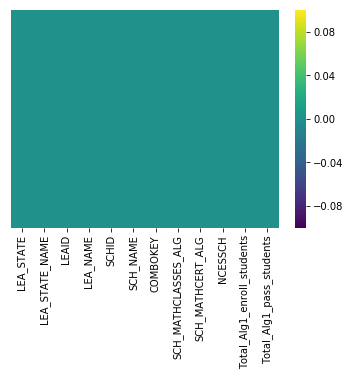

In [498]:
sns.heatmap(Alg1_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [499]:
Alg1_clean.describe()

,SCH_MATHCLASSES_ALG,SCH_MATHCERT_ALG,Total_Alg1_enroll_students,Total_Alg1_pass_students
count,22944.000000,22944.000000,22944.000000,22944.000000
mean,9.472324,7.861489,138.160739,105.434188
std,12.470792,10.926388,168.073739,132.136787
min,1.000000,0.000000,0.000000,0.000000
25%,2.000000,2.000000,24.000000,15.000000
50%,6.000000,4.000000,72.000000,54.000000
75%,12.000000,10.000000,192.000000,149.000000
max,472.000000,472.000000,1929.000000,1374.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001856D4A9DA0>,
      dtype=object)

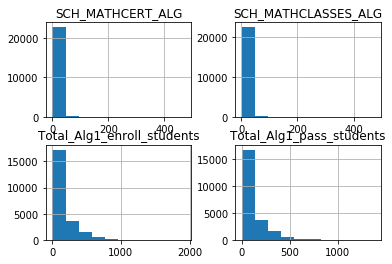

In [500]:
Alg1_clean.hist()

In [501]:
Alg1_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_Alg1.csv', index = False, header=True)

### 8. Cleaning Enrollment file

In [502]:
Enroll = pandas.read_csv("Enrollment.csv",encoding='cp1252')
Enroll.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,JJ,SCH_PSENR_NONIDEA_A3,SCH_PSENR_NONIDEA_A4,...,SCH_504ENR_BL_M,SCH_504ENR_BL_F,SCH_504ENR_WH_M,SCH_504ENR_WH_F,SCH_504ENR_TR_M,SCH_504ENR_TR_F,TOT_504ENR_M,TOT_504ENR_F,SCH_504ENR_LEP_M,SCH_504ENR_LEP_F
0,AL,ALABAMA,100002,Alabama Youth Services,1705,Wallace Sch - Mt Meigs Campus,10000201705,Yes,-9,-9,...,0,0,0,0,0,0,0,0,0,0
1,AL,ALABAMA,100002,Alabama Youth Services,1706,McNeel Sch - Vacca Campus,10000201706,Yes,-9,-9,...,0,0,0,0,0,0,0,0,0,0
2,AL,ALABAMA,100002,Alabama Youth Services,1876,Alabama Youth Services,10000201876,No,-9,-9,...,0,0,0,0,0,0,0,0,0,0
3,AL,ALABAMA,100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,10000299995,Yes,-9,-9,...,0,0,0,0,0,0,0,0,0,0
4,AL,ALABAMA,100005,Albertville City,870,Albertville Middle School,10000500870,No,-9,-9,...,0,0,0,4,0,0,0,4,0,0


In [503]:
Enroll['SCHID'] = Enroll['SCHID'].apply(lambda x: '{0:0>5}'.format(x))

In [504]:
Enroll['LEAID'] = Enroll['LEAID'].apply(lambda x: '{0:0>7}'.format(x))

In [505]:
Enroll.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'JJ', 'SCH_PSENR_NONIDEA_A3', 'SCH_PSENR_NONIDEA_A4',
       ...
       'SCH_504ENR_BL_M', 'SCH_504ENR_BL_F', 'SCH_504ENR_WH_M',
       'SCH_504ENR_WH_F', 'SCH_504ENR_TR_M', 'SCH_504ENR_TR_F', 'TOT_504ENR_M',
       'TOT_504ENR_F', 'SCH_504ENR_LEP_M', 'SCH_504ENR_LEP_F'],
      dtype='object', length=123)

In [506]:
Enroll.shape

(97632, 123)

In [507]:
Enroll=Enroll[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','TOT_ENR_M','TOT_ENR_F']]

In [508]:
Enroll.shape

(97632, 9)

In [509]:
cols = ['LEAID', 'SCHID']
Enroll['NCESSCH'] = Enroll[cols].apply(lambda row: ''.join(row.values.astype(str)), axis=1)

In [510]:
Enroll['Total_enroll_students'] = (Enroll['TOT_ENR_M'] + Enroll['TOT_ENR_F'])

In [511]:
Enroll.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'TOT_ENR_M', 'TOT_ENR_F', 'NCESSCH',
       'Total_enroll_students'],
      dtype='object')

In [512]:
Enroll=Enroll[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME','COMBOKEY','NCESSCH','Total_enroll_students']]

#### Excluding schools with 0 enrollment counts

In [513]:
Enroll_clean=Enroll[Enroll.Total_enroll_students > 0]

In [514]:
Enroll_clean.shape

(97621, 9)

#### Checking for missing or null values

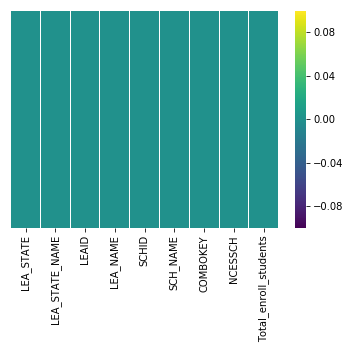

In [515]:
sns.heatmap(Enroll_clean.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [516]:
Enroll_clean.describe()

,Total_enroll_students
count,97621.000000
mean,521.633675
std,447.717932
min,1.000000
25%,252.000000
50%,438.000000
75%,657.000000
max,14286.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001857883F4A8>]],
      dtype=object)

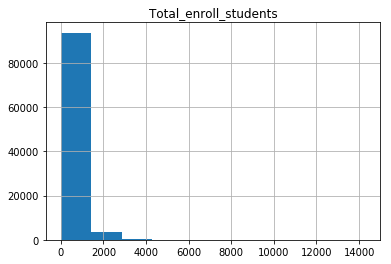

In [517]:
Enroll_clean.hist()

In [518]:
Enroll_clean.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_enrollment.csv', index = False,header=True)

#### 9. Merge CRDC school characteristics with CCD directory to extract only high schools

In [519]:
cd /Users/dansa/Documents/GitHub/Phase1/Data/CCD

C:\Users\dansa\Documents\GitHub\Phase1\Data\CCD


In [520]:
ccd_directory= pandas.read_csv("Clean_ccd_directory.csv")
ccd_directory.head()

,SCHOOL_YEAR,ST,SCH_NAME,LEA_NAME,STATE_AGENCY_NO,ST_LEAID,LEAID,ST_SCHID,NCESSCH,SCHID,SY_STATUS,SCH_TYPE_TEXT,SCH_TYPE,LEVEL
0,2017-2018,AL,Albertville Middle School,Albertville City,1,AL-101,100005,AL-101-0010,10000500870,100870,1,Regular School,1,Middle
1,2017-2018,AL,Albertville High School,Albertville City,1,AL-101,100005,AL-101-0020,10000500871,100871,1,Regular School,1,High
2,2017-2018,AL,Evans Elementary School,Albertville City,1,AL-101,100005,AL-101-0110,10000500879,100879,1,Regular School,1,Middle
3,2017-2018,AL,Albertville Elementary School,Albertville City,1,AL-101,100005,AL-101-0200,10000500889,100889,1,Regular School,1,Elementary
4,2017-2018,AL,Big Spring Lake Kindergarten School,Albertville City,1,AL-101,100005,AL-101-0035,10000501616,101616,1,Regular School,1,Elementary


In [521]:
ccd_directory['NCESSCH'] = ccd_directory['NCESSCH'].apply(lambda x: '{0:0>12}'.format(x))

In [522]:
ccd_directory.drop(ccd_directory.columns[[4,5,6,10,11]], axis=1, inplace=True)

In [523]:
ccd_directory.shape

(102337, 9)

In [524]:
Sch_char_merged_ccd = pandas.merge(left=Sch_char,right=ccd_directory, how='left', left_on='NCESSCH', right_on='NCESSCH')
Sch_char_merged_ccd.shape

(97632, 24)

In [525]:
Sch_char_merged_ccd.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY,Special_ed_schl,Magnet_schl,Charter_Schl,...,Charter_Schl_new,Alternate_schl_new,SCHOOL_YEAR,ST,SCH_NAME_y,LEA_NAME_y,ST_SCHID,SCHID_y,SCH_TYPE,LEVEL
0,AL,ALABAMA,0100002,Alabama Youth Services,01705,Wallace Sch - Mt Meigs Campus,010000201705,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,AL,ALABAMA,0100002,Alabama Youth Services,01706,McNeel Sch - Vacca Campus,010000201706,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AL,ALABAMA,0100002,Alabama Youth Services,01876,Alabama Youth Services,010000201876,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,AL,ALABAMA,0100002,Alabama Youth Services,99995,AUTAUGA CAMPUS,010000299995,No,No,No,...,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,AL,ALABAMA,0100005,Albertville City,00870,Albertville Middle School,010000500870,No,No,No,...,0,0,2017-2018,AL,Albertville Middle School,Albertville City,AL-101-0010,100870.0,1.0,Middle


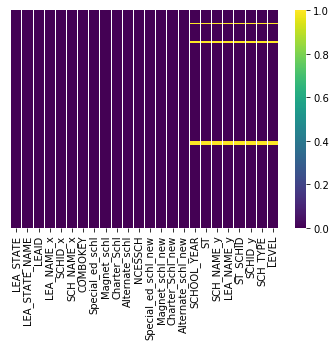

In [526]:
sns.heatmap(Sch_char_merged_ccd.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [527]:
null_columns=Sch_char_merged_ccd.columns[Sch_char_merged_ccd.isnull().any()]
Sch_char_merged_ccd[null_columns].isnull().sum()

SCHOOL_YEAR    3768
ST             3768
SCH_NAME_y     3768
LEA_NAME_y     3768
ST_SCHID       3768
SCHID_y        3768
SCH_TYPE       3768
LEVEL          3768
dtype: int64

#### Keeping only high schools

In [528]:
Sch_char_hs=Sch_char_merged_ccd[Sch_char_merged_ccd['LEVEL']=='High' ]

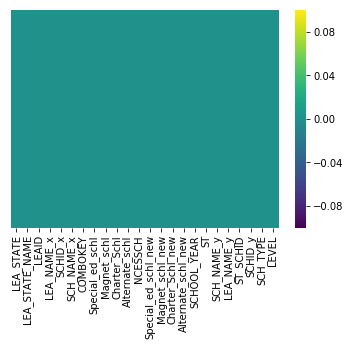

In [529]:
sns.heatmap(Sch_char_hs.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [530]:
Sch_char_hs.shape

(20685, 24)

In [531]:
Sch_char_hs.columns

Index(['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY', 'Special_ed_schl', 'Magnet_schl',
       'Charter_Schl', 'Alternate_schl', 'NCESSCH', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new',
       'SCHOOL_YEAR', 'ST', 'SCH_NAME_y', 'LEA_NAME_y', 'ST_SCHID', 'SCHID_y',
       'SCH_TYPE', 'LEVEL'],
      dtype='object')

In [532]:
Sch_char_hs.head()

,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY,Special_ed_schl,Magnet_schl,Charter_Schl,...,Charter_Schl_new,Alternate_schl_new,SCHOOL_YEAR,ST,SCH_NAME_y,LEA_NAME_y,ST_SCHID,SCHID_y,SCH_TYPE,LEVEL
5,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,No,No,No,...,0,0,2017-2018,AL,Albertville High School,Albertville City,AL-101-0020,100871.0,1.0,High
11,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,No,No,No,...,0,0,2017-2018,AL,Asbury High School,Marshall County,AL-048-0030,100872.0,1.0,High
14,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,No,No,No,...,0,0,2017-2018,AL,Douglas High School,Marshall County,AL-048-0100,100878.0,1.0,High
16,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,No,No,No,...,0,0,2017-2018,AL,Kate D Smith DAR High School,Marshall County,AL-048-0140,100883.0,1.0,High
19,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,No,No,No,...,0,0,2017-2018,AL,Brindlee Mountain High School,Marshall County,AL-048-0042,101585.0,1.0,High


In [533]:
Sch_char_hs.drop([col for col in Sch_char_hs.columns if col.endswith('_y')],axis=1,inplace=True)

In [534]:
HS_Sch_char=Sch_char_hs[['LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME_x', 'SCHID_x','SCH_NAME_x','COMBOKEY','Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH','LEVEL']]

In [535]:
HS_Sch_char.shape

(20685, 13)

#### 10. Merge remaining CRDC clean files

##### Merging with school enroll

In [536]:
HS_Sch_char_merged_enroll = pandas.merge(left=HS_Sch_char,right=Enroll_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_merged_enroll.shape

(20685, 21)

In [537]:
HS_Sch_char_merged_enroll.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'LEA_STATE_y', 'LEA_STATE_NAME_y', 'LEAID_y', 'LEA_NAME', 'SCHID',
       'SCH_NAME', 'COMBOKEY_y', 'Total_enroll_students'],
      dtype='object')

In [538]:
#HS_Sch_char_merged_exp.head()

In [539]:
HS_Sch_char_merged_enroll.drop([col for col in HS_Sch_char_merged_enroll.columns if col.endswith('_y')],axis=1,inplace=True)

In [540]:
HS_Sch_char_merged_enroll.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'Total_enroll_students'],
      dtype='object')

In [541]:
HS_Sch_char_merged_enroll.shape

(20685, 17)

In [542]:
HS_Sch_char_enroll=HS_Sch_char_merged_enroll[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students']]

##### Merging with school support

In [543]:
HS_Sch_char_enroll_merged_sup = pandas.merge(left=HS_Sch_char_enroll,right=Sch_sup_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_merged_sup.shape

(20685, 24)

In [544]:
HS_Sch_char_enroll_merged_sup.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT'],
      dtype='object')

In [545]:
HS_Sch_char_enroll_merged_sup.head()

,LEA_STATE_x,LEA_STATE_NAME_x,LEAID_x,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY_x,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,...,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,SCH_FTETEACH_TOT,SCH_FTETEACH_CERT,SCH_FTETEACH_NOTCERT
0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,0,0,0,...,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,78.17,71.17,7.0
1,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,32.00,31.00,1.0
2,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,36.00,36.00,0.0
3,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,29.00,29.00,0.0
4,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,0,0,0,...,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,37.00,36.00,1.0


In [546]:
HS_Sch_char_enroll_sup=HS_Sch_char_enroll_merged_sup[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students','SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT']]

In [547]:
HS_Sch_char_enroll_sup.shape

(20685, 17)

##### Merging with school expenditures

In [548]:
HS_Sch_char_enroll_sup_merged_exp = pandas.merge(left=HS_Sch_char_enroll_sup,right=Sch_exp_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_merged_exp.shape

(20685, 26)

In [549]:
HS_Sch_char_enroll_sup_merged_exp.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'FTE_teachers_count',
       'SalaryforTeachers'],
      dtype='object')

In [550]:
HS_Sch_char_enroll_sup_merged_exp.head()

,LEA_STATE_x,LEA_STATE_NAME_x,LEAID_x,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY_x,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,...,SCH_FTETEACH_NOTCERT,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,FTE_teachers_count,SalaryforTeachers
0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,0,0,0,...,7.0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,72.88,3780956.34
1,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,0,0,0,...,1.0,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,32.00,1551823.89
2,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,0,0,0,...,0.0,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,36.00,1654974.93
3,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,0,0,0,...,0.0,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,29.00,1256524.51
4,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,0,0,0,...,1.0,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,37.00,1540288.05


In [551]:
HS_Sch_char_enroll_sup_exp=HS_Sch_char_enroll_sup_merged_exp[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students','SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT','FTE_teachers_count','SalaryforTeachers']]

In [552]:
HS_Sch_char_enroll_sup_exp.shape

(20685, 19)

##### Merging with SAT_ACT

In [553]:
HS_Sch_char_enroll_sup_exp_merged_SA = pandas.merge(left=HS_Sch_char_enroll_sup_exp,right=SAT_ACT_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_merged_SA.shape

(20685, 29)

In [554]:
HS_Sch_char_enroll_sup_exp_merged_SA.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'Male_part_count', 'Female_part_count',
       'Total_SAT_ACT_students'],
      dtype='object')

In [555]:
HS_Sch_char_enroll_sup_exp_merged_SA.head()

,LEA_STATE_x,LEA_STATE_NAME_x,LEAID_x,LEA_NAME_x,SCHID_x,SCH_NAME_x,COMBOKEY_x,Special_ed_schl_new,Magnet_schl_new,Charter_Schl_new,...,LEA_STATE,LEA_STATE_NAME,LEAID,LEA_NAME,SCHID,SCH_NAME,COMBOKEY,Male_part_count,Female_part_count,Total_SAT_ACT_students
0,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,0,0,0,...,AL,ALABAMA,0100005,Albertville City,00871,Albertville High School,010000500871,177.0,186.0,363.0
1,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00872,Asbury High School,010000600872,37.0,24.0,61.0
2,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00878,Douglas High School,010000600878,83.0,59.0,142.0
3,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,0,0,0,...,AL,ALABAMA,0100006,Marshall County,00883,Kate D Smith DAR High School,010000600883,56.0,47.0,103.0
4,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,0,0,0,...,AL,ALABAMA,0100006,Marshall County,01585,Brindlee Mountain High School,010000601585,45.0,31.0,76.0


In [556]:
HS_Sch_char_enroll_sup_exp_SA=HS_Sch_char_enroll_sup_exp_merged_SA[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL', 'Total_enroll_students','SCH_FTETEACH_TOT',
       'SCH_FTETEACH_CERT', 'SCH_FTETEACH_NOTCERT','FTE_teachers_count','SalaryforTeachers','Total_SAT_ACT_students']]

In [557]:
HS_Sch_char_enroll_sup_exp_SA.shape

(20685, 20)

##### Merging with IB

In [558]:
HS_Sch_char_enroll_sup_exp_SA_merged_IB = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA,right=IB_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_merged_IB.shape

(20685, 32)

In [559]:
HS_Sch_char_enroll_sup_exp_SA_merged_IB.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'LEA_STATE', 'LEA_STATE_NAME', 'LEAID',
       'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY', 'SCH_IBENR_IND',
       'Male_enroll_count', 'Female_enroll_count', 'Total_IB_students',
       'SCH_IBENR_IND_new'],
      dtype='object')

In [560]:
#HS_Sch_char_enroll_sup_exp_SA_merged_IB.head()

In [561]:
HS_Sch_char_enroll_sup_exp_SA_IB=HS_Sch_char_enroll_sup_exp_SA_merged_IB[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT','SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students','SCH_IBENR_IND_new','Total_IB_students']]

In [562]:
HS_Sch_char_enroll_sup_exp_SA_IB.shape

(20685, 22)

#### For AP there are columns that are specific to math and reading so lets only include the relevant columns for each subject area

##### Merging with AP other

In [563]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB,right=AP_other_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other.shape

(20685, 36)

In [564]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APOTHENR_IND',
       'Total_AP_other_students', 'Total_students_tookAP', 'SCH_APENR_IND_new',
       'SCH_APOTHENR_IND_new'],
      dtype='object')

In [565]:
#HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other.head()

In [566]:
HS_Sch_char_enroll_sup_exp_SA_IB_AP_other=HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_other[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new','Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APOTHENR_IND_new',
       'Total_AP_other_students', 'Total_students_tookAP']]

In [567]:
HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.shape

(20685, 27)

#### Checking for missing or null values

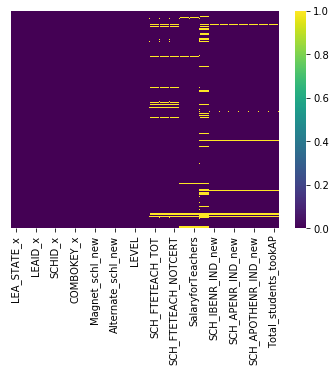

In [568]:
sns.heatmap(HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [569]:
null_columns=HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.columns[HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.isnull().any()]
HS_Sch_char_enroll_sup_exp_SA_IB_AP_other[null_columns].isnull().sum()

Total_enroll_students         1
SCH_FTETEACH_TOT            821
SCH_FTETEACH_CERT           821
SCH_FTETEACH_NOTCERT        821
FTE_teachers_count          776
SalaryforTeachers           776
Total_SAT_ACT_students     3452
SCH_IBENR_IND_new           402
Total_IB_students           402
SCH_APENR_IND_new           404
SCH_APCOURSES               404
SCH_APOTHENR_IND_new        404
Total_AP_other_students     404
Total_students_tookAP       404
dtype: int64

In [570]:
crdc_master_read = HS_Sch_char_enroll_sup_exp_SA_IB_AP_other.dropna(axis = 0, how ='any') 

In [571]:
print("Old data frame length:", len(HS_Sch_char_enroll_sup_exp_SA_IB_AP_other)) 
print("New data frame length:", len(crdc_master_read))  
print("Number of rows with at least 1 NA value: ", 
      (len(HS_Sch_char_enroll_sup_exp_SA_IB_AP_other)-len(crdc_master_read))) 

Old data frame length: 20685
New data frame length: 16807
Number of rows with at least 1 NA value:  3878


#### Checking for missing or null values

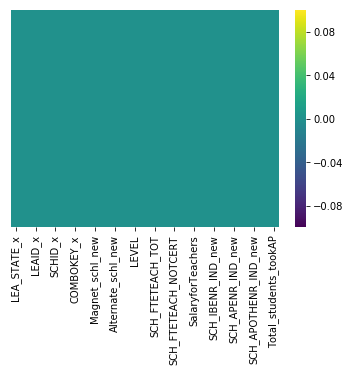

In [572]:
sns.heatmap(crdc_master_read.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [573]:
crdc_master_read.shape

(16807, 27)

#### All relevant features necessary for the reading dataset are included so lets save this as crdc_master file for the reading

In [574]:
crdc_master_read.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_master_read.csv', index = False,header=True)

##### Merging with AP math

In [575]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB,right=AP_math_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math.shape

(20685, 36)

In [576]:
HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'LEA_STATE', 'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME',
       'COMBOKEY', 'SCH_APENR_IND', 'SCH_APCOURSES', 'SCH_APMATHENR_IND',
       'Total_AP_math_students', 'Total_students_tookAP', 'SCH_APENR_IND_new',
       'SCH_APMATHENR_IND_new'],
      dtype='object')

In [577]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath=HS_Sch_char_enroll_sup_exp_SA_IB_merged_AP_math[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP']]

In [578]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath.shape

(20685, 27)

##### Merging with Alg1 

In [579]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1 = pandas.merge(left=HS_Sch_char_enroll_sup_exp_SA_IB_APmath,right=Alg1_clean, how='left', left_on='NCESSCH', right_on='NCESSCH')
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1.shape

(20685, 38)

In [580]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1.columns

Index(['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new', 'Magnet_schl_new',
       'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL',
       'Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers',
       'Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students',
       'SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP', 'LEA_STATE',
       'LEA_STATE_NAME', 'LEAID', 'LEA_NAME', 'SCHID', 'SCH_NAME', 'COMBOKEY',
       'SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students'],
      dtype='object')

In [581]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_merged_Alg1[['LEA_STATE_x', 'LEA_STATE_NAME_x', 'LEAID_x', 'LEA_NAME_x', 'SCHID_x',
       'SCH_NAME_x', 'COMBOKEY_x', 'Special_ed_schl_new',
       'Magnet_schl_new', 'Charter_Schl_new', 'Alternate_schl_new', 'NCESSCH', 'LEVEL','Total_enroll_students', 'SCH_FTETEACH_TOT', 'SCH_FTETEACH_CERT',
       'SCH_FTETEACH_NOTCERT', 'FTE_teachers_count', 'SalaryforTeachers','Total_SAT_ACT_students', 'SCH_IBENR_IND_new', 'Total_IB_students','SCH_APENR_IND_new', 'SCH_APCOURSES', 'SCH_APMATHENR_IND_new',
       'Total_AP_math_students', 'Total_students_tookAP','SCH_MATHCLASSES_ALG', 'SCH_MATHCERT_ALG', 'Total_Alg1_enroll_students',
       'Total_Alg1_pass_students']]

In [582]:
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.shape

(20685, 31)

#### Checking for missing or null values

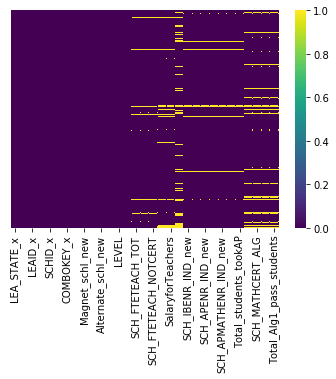

In [583]:
sns.heatmap(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [584]:
null_columns=HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.columns[HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.isnull().any()]
HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1[null_columns].isnull().sum()

Total_enroll_students            1
SCH_FTETEACH_TOT               821
SCH_FTETEACH_CERT              821
SCH_FTETEACH_NOTCERT           821
FTE_teachers_count             776
SalaryforTeachers              776
Total_SAT_ACT_students        3452
SCH_IBENR_IND_new              402
Total_IB_students              402
SCH_APENR_IND_new              409
SCH_APCOURSES                  409
SCH_APMATHENR_IND_new          409
Total_AP_math_students         409
Total_students_tookAP          409
SCH_MATHCLASSES_ALG           2056
SCH_MATHCERT_ALG              2056
Total_Alg1_enroll_students    2056
Total_Alg1_pass_students      2056
dtype: int64

In [585]:
crdc_master_math = HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1.dropna(axis = 0, how ='any') 

In [586]:
print("Old data frame length:", len(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1)) 
print("New data frame length:", len(crdc_master_math))  
print("Number of rows with at least 1 NA value: ", 
      (len(HS_Sch_char_enroll_sup_exp_SA_IB_APmath_Alg1)-len(crdc_master_math))) 

Old data frame length: 20685
New data frame length: 16018
Number of rows with at least 1 NA value:  4667


In [587]:
crdc_master_math.shape

(16018, 31)

In [588]:
crdc_master_math.dtypes

LEA_STATE_x                    object
LEA_STATE_NAME_x               object
LEAID_x                        object
LEA_NAME_x                     object
SCHID_x                        object
SCH_NAME_x                     object
COMBOKEY_x                     object
Special_ed_schl_new             int32
Magnet_schl_new                 int32
Charter_Schl_new                int32
Alternate_schl_new              int32
NCESSCH                        object
LEVEL                          object
Total_enroll_students         float64
SCH_FTETEACH_TOT              float64
SCH_FTETEACH_CERT             float64
SCH_FTETEACH_NOTCERT          float64
FTE_teachers_count            float64
SalaryforTeachers             float64
Total_SAT_ACT_students        float64
SCH_IBENR_IND_new             float64
Total_IB_students             float64
SCH_APENR_IND_new             float64
SCH_APCOURSES                 float64
SCH_APMATHENR_IND_new         float64
Total_AP_math_students        float64
Total_studen

#### All relevant features necessary for the math dataset are included so lets save this as crdc_master file for the math

In [589]:
crdc_master_math.to_csv (r'/Users/dansa/Documents/GitHub/Phase1/Data/CRDC/Clean_crdc_master_math.csv', index = False,header=True)